In [16]:
import pandas as pd
import numpy as np

In [17]:
CSV_FILE_TRAIN_X = 'Data/AMF_train_X_XCZw8r3.csv'
CSV_FILE_TEST_X = 'Data/AMF_test_X_uDs0jHH.csv'
CSV_FILE_TRAIN_Y = 'Data/AMF_train_Y_omYQJZL.csv'

In [18]:
df_x_train = pd.read_csv(CSV_FILE_TRAIN_X, index_col=0, sep=',')
df_y_train = pd.read_csv(CSV_FILE_TRAIN_Y, sep=',')

df_x_test = pd.read_csv(CSV_FILE_TEST_X, index_col=0, sep=',')

In [19]:
# display(df_x_train)
print("X train shape", df_x_train.shape)
print("Y train shape", df_y_train.shape)
print("X test shape", df_x_test.shape)

X train shape (105782, 38)
Y train shape (86, 2)
X test shape (85304, 38)


In [20]:
shares = list(set(df_x_train['Share']))
shares_t = list(set(df_x_test['Share']))

common = [s for s in shares_t if s in shares]
print(len(common), len(shares), len(shares_t))

115 119 118


In [21]:
df_x_train.dtypes

Share                          object
Day                            object
Trader                         object
OTR                           float64
OCR                           float64
OMR                           float64
min_time_two_events           float64
mean_time_two_events          float64
10_p_time_two_events          float64
med_time_two_events           float64
25_p_time_two_events          float64
75_p_time_two_events          float64
90_p_time_two_events          float64
max_time_two_events           float64
min_lifetime_cancel           float64
mean_lifetime_cancel          float64
10_p_lifetime_cancel          float64
med_lifetime_cancel           float64
25_p_lifetime_cancel          float64
75_p_lifetime_cancel          float64
90_p_lifetime_cancel          float64
max_lifetime_cancel           float64
NbTradeVenueMic                 int64
MaxNbTradesBySecond             int64
MeanNbTradesBySecond          float64
min_dt_TV1                    float64
mean_dt_TV1 

In [22]:
df_x_train.dtypes['OTR']

dtype('float64')

In [23]:
# dict traders train
traders_train = list(set(df_x_train['Trader']))
len(traders_train)

86

In [24]:
# dict traders test
traders_test = list(set(df_x_test['Trader']))
len(traders_test)

85

In [25]:
# traders_train

In [26]:
for trader in traders_test:
    if trader in traders_train:
        print(trader)

No common trader between train and test

## Evaluate NaN

In [27]:
dtypes = ['float64', 'int64']

for key in df_x_train.dtypes.keys():
#     if df_x_train.dtypes[key] == 'float64':
#         print("Float:",key)
#     elif df_x_train.dtypes[key] == 'int64':
#         print("Int:",key)
    pass

In [28]:
for key in df_x_train.columns:
    print(key,":",df_x_train[key].isna().sum())

Share : 0
Day : 0
Trader : 0
OTR : 1683
OCR : 0
OMR : 47612
min_time_two_events : 0
mean_time_two_events : 0
10_p_time_two_events : 0
med_time_two_events : 0
25_p_time_two_events : 0
75_p_time_two_events : 0
90_p_time_two_events : 0
max_time_two_events : 0
min_lifetime_cancel : 0
mean_lifetime_cancel : 0
10_p_lifetime_cancel : 0
med_lifetime_cancel : 0
25_p_lifetime_cancel : 0
75_p_lifetime_cancel : 0
90_p_lifetime_cancel : 0
max_lifetime_cancel : 0
NbTradeVenueMic : 0
MaxNbTradesBySecond : 0
MeanNbTradesBySecond : 0
min_dt_TV1 : 4235
mean_dt_TV1 : 4235
med_dt_TV1 : 4235
min_dt_TV1_TV2 : 25176
mean_dt_TV1_TV2 : 25176
med_dt_TV1_TV2 : 25176
min_dt_TV1_TV3 : 25255
mean_dt_TV1_TV3 : 25255
med_dt_TV1_TV3 : 25255
min_dt_TV1_TV4 : 25148
mean_dt_TV1_TV4 : 25148
med_dt_TV1_TV4 : 25148
NbSecondWithAtLeatOneTrade : 0


In [29]:
list(df_x_train['OMR']).count(0)

0

In [30]:
list(df_x_train['OCR']).count(0)

0

In [31]:
list(df_x_train['OTR']).count(0)

0

In [32]:
for key in ['OTR', 'OCR', 'OMR']:
    df_x_train[key] = df_x_train[key].fillna(0)

In [33]:
for key in df_x_train.columns:
    print(key,":",df_x_train[key].isna().sum())

Share : 0
Day : 0
Trader : 0
OTR : 0
OCR : 0
OMR : 0
min_time_two_events : 0
mean_time_two_events : 0
10_p_time_two_events : 0
med_time_two_events : 0
25_p_time_two_events : 0
75_p_time_two_events : 0
90_p_time_two_events : 0
max_time_two_events : 0
min_lifetime_cancel : 0
mean_lifetime_cancel : 0
10_p_lifetime_cancel : 0
med_lifetime_cancel : 0
25_p_lifetime_cancel : 0
75_p_lifetime_cancel : 0
90_p_lifetime_cancel : 0
max_lifetime_cancel : 0
NbTradeVenueMic : 0
MaxNbTradesBySecond : 0
MeanNbTradesBySecond : 0
min_dt_TV1 : 4235
mean_dt_TV1 : 4235
med_dt_TV1 : 4235
min_dt_TV1_TV2 : 25176
mean_dt_TV1_TV2 : 25176
med_dt_TV1_TV2 : 25176
min_dt_TV1_TV3 : 25255
mean_dt_TV1_TV3 : 25255
med_dt_TV1_TV3 : 25255
min_dt_TV1_TV4 : 25148
mean_dt_TV1_TV4 : 25148
med_dt_TV1_TV4 : 25148
NbSecondWithAtLeatOneTrade : 0


Several rows for a single trader : how to aggregate ? Majority vote ?

Build a predictor on each row, and then majority vote, with thresholds (just like AMF suggests)

In [34]:
complex_features = ['min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
                    'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2',
                    'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 'med_dt_TV1_TV3',
                    'min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']

for key in df_x_train.columns:
    if key not in complex_features:
        print(key,":",df_x_train[key].isna().sum())

Share : 0
Day : 0
Trader : 0
OTR : 0
OCR : 0
OMR : 0
min_time_two_events : 0
mean_time_two_events : 0
10_p_time_two_events : 0
med_time_two_events : 0
25_p_time_two_events : 0
75_p_time_two_events : 0
90_p_time_two_events : 0
max_time_two_events : 0
min_lifetime_cancel : 0
mean_lifetime_cancel : 0
10_p_lifetime_cancel : 0
med_lifetime_cancel : 0
25_p_lifetime_cancel : 0
75_p_lifetime_cancel : 0
90_p_lifetime_cancel : 0
max_lifetime_cancel : 0
NbTradeVenueMic : 0
MaxNbTradesBySecond : 0
MeanNbTradesBySecond : 0
NbSecondWithAtLeatOneTrade : 0


In [35]:
df_x_train[df_x_train['NbTradeVenueMic'] == 1 
           & (df_x_train['min_dt_TV1_TV2'] == df_x_train['min_dt_TV1_TV2']) ]

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,


## Feature selection

In [36]:
HFT = 'HFT'
NON_HFT = 'NON HFT'
MIX = 'MIX'
PURE = [HFT, NON_HFT]

hft_traders = df_y_train[df_y_train['type'] == HFT]['Trader']
non_hft_traders = df_y_train[df_y_train['type'] == NON_HFT]['Trader']
mix_traders = df_y_train[df_y_train['type'] == MIX]['Trader']

15 pur HFT, 47 pur non HFT, 24 MIX

In [37]:
print("Total:",df_x_train.shape[0], "rows")

Total: 105782 rows


In [38]:
print("Pure traders:",df_x_train[(df_x_train['Trader'].isin(hft_traders)) 
                                | (df_x_train['Trader'].isin(non_hft_traders)) ].shape[0], "rows")

Pure traders: 54299 rows


In [39]:
print("Mix traders:",df_x_train[(df_x_train['Trader'].isin(mix_traders))].shape[0], "rows")

Mix traders: 51483 rows


In [40]:
mix_traders

0     Trader_285
9     Trader_245
21     Trader_26
23    Trader_205
24    Trader_395
25    Trader_358
28    Trader_164
32    Trader_430
40     Trader_38
50    Trader_338
51    Trader_233
52    Trader_431
53    Trader_329
55    Trader_310
59    Trader_172
64    Trader_241
69    Trader_264
73    Trader_107
78    Trader_209
80    Trader_461
81    Trader_140
82    Trader_451
83    Trader_438
85    Trader_330
Name: Trader, dtype: object

## Features correlation

In [41]:
reduced_x_train = pd.DataFrame()
for key in df_x_train.columns:
    if key not in complex_features:
        reduced_x_train[key] = df_x_train[key]

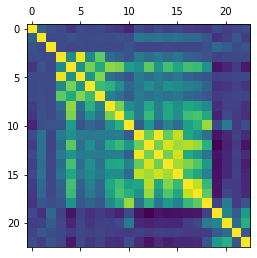

In [42]:
import matplotlib.pyplot as plt

df_x_train
plt.matshow(reduced_x_train.corr())
plt.show()

In [43]:
reduced_x_train.corr()

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,NbSecondWithAtLeatOneTrade
OTR,1.000000,0.096275,0.014968,-0.012811,-0.101874,-0.012007,-0.032422,-0.013393,-0.066009,-0.103295,...,-0.010426,-0.052185,-0.024621,-0.073598,-0.087565,-0.112103,-0.019106,-0.067357,-0.036383,-0.012015
OCR,0.096275,1.000000,-0.011808,-0.006657,0.023246,-0.005299,-0.005191,-0.000625,-0.002164,0.018882,...,0.190817,0.164881,0.179156,0.138106,0.121536,0.040667,-0.119905,-0.050959,0.043748,-0.074081
OMR,0.014968,-0.011808,1.000000,-0.007330,-0.030054,-0.007955,-0.017414,-0.010466,-0.022443,-0.021820,...,-0.035306,-0.032345,-0.036524,-0.032004,-0.026268,0.009866,0.127506,0.073115,0.003868,0.023847
min_time_two_events,-0.012811,-0.006657,-0.007330,1.000000,0.312642,0.960057,0.319149,0.676722,0.150869,0.092308,...,0.229458,0.154132,0.203099,0.098641,0.072730,0.037732,-0.055133,-0.033042,-0.022007,-0.027009
mean_time_two_events,-0.101874,0.023246,-0.030054,0.312642,1.000000,0.347357,0.732070,0.485610,0.775113,0.741386,...,0.374720,0.608878,0.468923,0.606643,0.580956,0.363090,-0.239450,-0.170662,-0.088899,-0.218342
10_p_time_two_events,-0.012007,-0.005299,-0.007955,0.960057,0.347357,1.000000,0.365484,0.758248,0.170310,0.104196,...,0.234626,0.160550,0.209012,0.104407,0.077612,0.038938,-0.061310,-0.037847,-0.024199,-0.030777
med_time_two_events,-0.032422,-0.005191,-0.017414,0.319149,0.732070,0.365484,1.000000,0.580420,0.527381,0.345544,...,0.240654,0.349468,0.318987,0.265550,0.221236,0.110857,-0.115911,-0.103573,-0.049932,-0.096768
25_p_time_two_events,-0.013393,-0.000625,-0.010466,0.676722,0.485610,0.758248,0.580420,1.000000,0.266199,0.167109,...,0.224297,0.178234,0.214072,0.127942,0.102734,0.046982,-0.083858,-0.058613,-0.035207,-0.048348
75_p_time_two_events,-0.066009,-0.002164,-0.022443,0.150869,0.775113,0.170310,0.527381,0.266199,1.000000,0.733030,...,0.258292,0.465931,0.337920,0.472188,0.432872,0.307471,-0.135291,-0.051484,-0.061272,-0.121410
90_p_time_two_events,-0.103295,0.018882,-0.021820,0.092308,0.741386,0.104196,0.345544,0.167109,0.733030,1.000000,...,0.260613,0.487384,0.338881,0.591107,0.624614,0.479782,-0.185942,-0.020157,-0.075641,-0.131835


In [44]:
reduced_x_train.corr()['OTR']['OCR']

0.09627463157768318

In [89]:
corr = reduced_x_train.corr()
list(corr.columns)

['OTR',
 'OCR',
 'OMR',
 'min_time_two_events',
 'mean_time_two_events',
 '10_p_time_two_events',
 'med_time_two_events',
 '25_p_time_two_events',
 '75_p_time_two_events',
 '90_p_time_two_events',
 'max_time_two_events',
 'min_lifetime_cancel',
 'mean_lifetime_cancel',
 '10_p_lifetime_cancel',
 'med_lifetime_cancel',
 '25_p_lifetime_cancel',
 '75_p_lifetime_cancel',
 '90_p_lifetime_cancel',
 'max_lifetime_cancel',
 'NbTradeVenueMic',
 'MaxNbTradesBySecond',
 'MeanNbTradesBySecond',
 'NbSecondWithAtLeatOneTrade']

In [92]:
corr = reduced_x_train.corr()
seen_keys = []
for i in corr.columns:
    for j in seen_keys:
        if(corr[i][j] > 0.8):
            print(corr[i][j],"between", i, "and", j)
    seen_keys.append(i)

0.9600572552573262 between 10_p_time_two_events and min_time_two_events
0.9808722744737192 between 10_p_lifetime_cancel and min_lifetime_cancel
0.9247302296687285 between med_lifetime_cancel and mean_lifetime_cancel
0.8791843840989176 between 25_p_lifetime_cancel and min_lifetime_cancel
0.8184157207067614 between 25_p_lifetime_cancel and mean_lifetime_cancel
0.9112412960184457 between 25_p_lifetime_cancel and 10_p_lifetime_cancel
0.8304071633358082 between 25_p_lifetime_cancel and med_lifetime_cancel
0.8574969865174444 between 75_p_lifetime_cancel and mean_lifetime_cancel
0.8821213606652741 between 90_p_lifetime_cancel and 75_p_lifetime_cancel
0.8025992904683887 between max_lifetime_cancel and max_time_two_events


Drop 10_p_time_two_events, 10_p_lifetime_cancel, med_lifetime_cancel, mean_lifetime_cancel, min_lifetime_cancel, 90_p_lifetime_cancel